<a href="https://colab.research.google.com/github/tdolce2021/Repo_Dolce/blob/main/Dolce%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times.

4) Report best, worst, and average of the three runs.

Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas

In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

this is how you start up any notebook/code. you have to introduce imports to utilize the code and run the notebook smoothly with no errors.

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

The GPU() and GPU_data() functions create PyTorch tensors and specify that they should be stored on a GPU. The plot() function creates a plot of a given data using the imshow() method. The get_google_slide() function generates the URL of a google slides presentation in a pdf. The get_slides() function uses the requests library to download the pdf file from the generated URL, then uses the convert_from_path() method convert the pdf into a series of images. The load() function uses transformations to an image and returns it as a PyTorch tensor.

In [8]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

creates a key value for each pair that is returned from the URL. 'alexnet' is set to use default weights. 'eval' ses everything to evaluation mode.

In [3]:
"https://docs.google.com/presentation/d/125O1Y5jK5DDzuPJ4RdSRSqK-WgU2Sp7DKUvETU9P-UE/edit?usp=sharing"

'https://docs.google.com/presentation/d/125O1Y5jK5DDzuPJ4RdSRSqK-WgU2Sp7DKUvETU9P-UE/edit?usp=sharing'

In [4]:
url = "https://docs.google.com/presentation/d/125O1Y5jK5DDzuPJ4RdSRSqK-WgU2Sp7DKUvETU9P-UE/edit#slide=id.p"

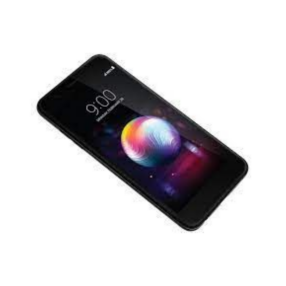

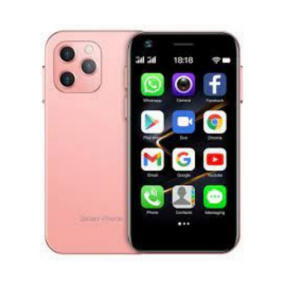

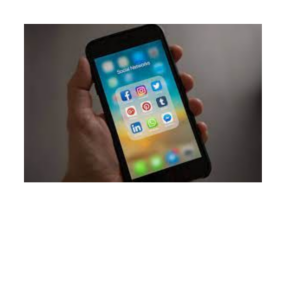

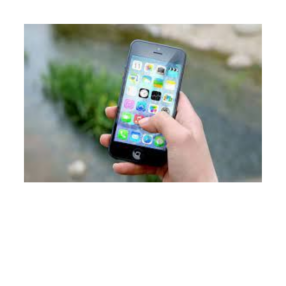

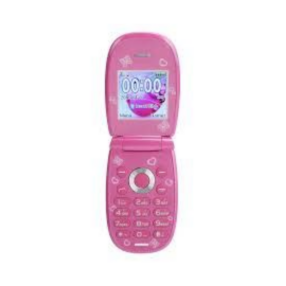

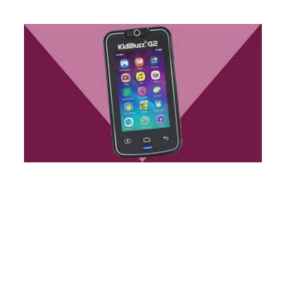

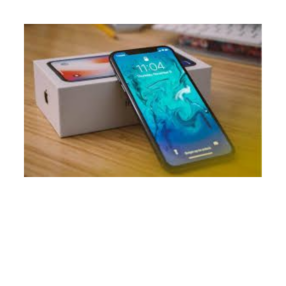

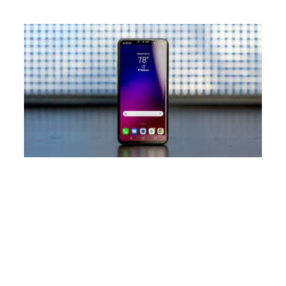

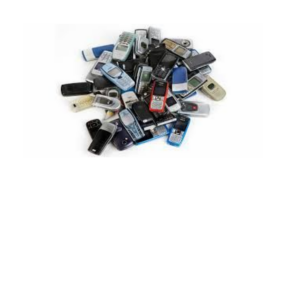

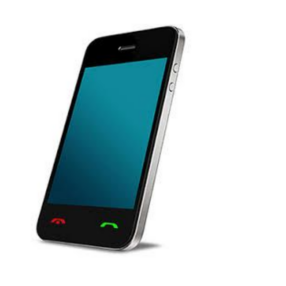

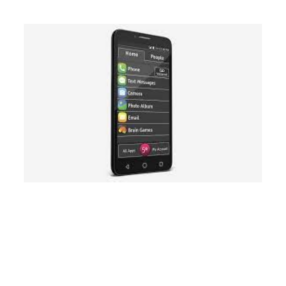

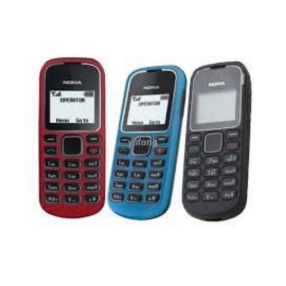

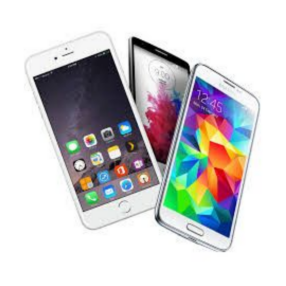

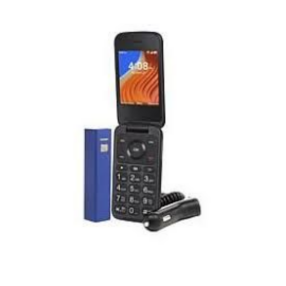

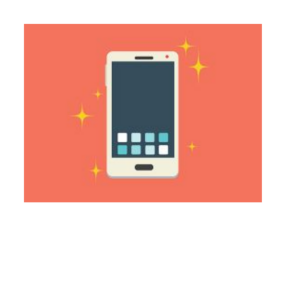

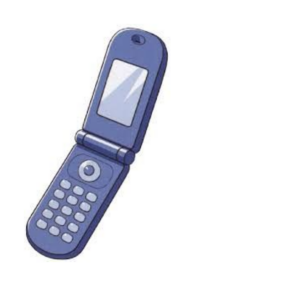

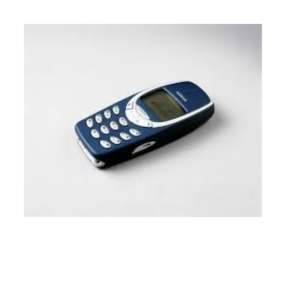

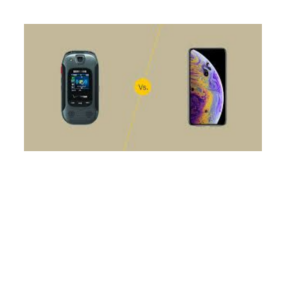

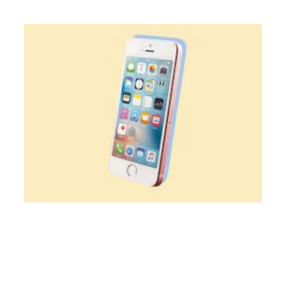

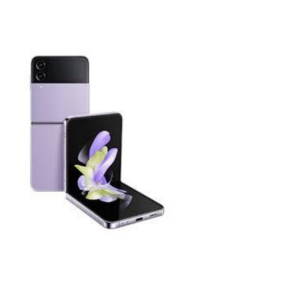

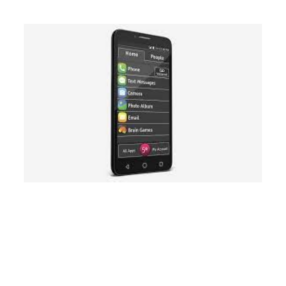

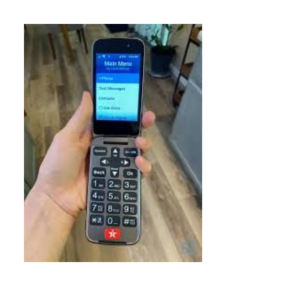

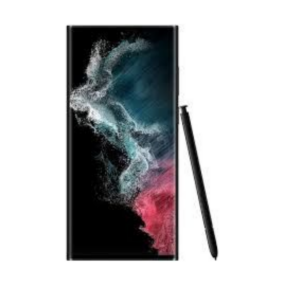

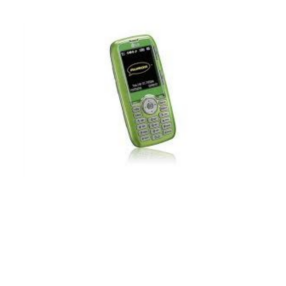

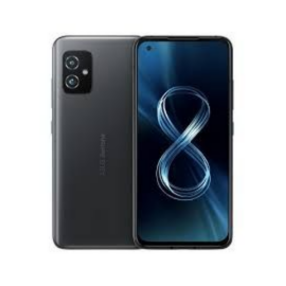

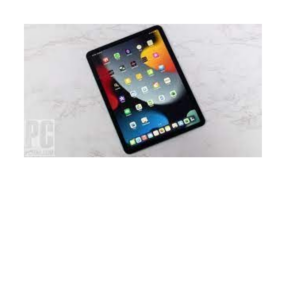

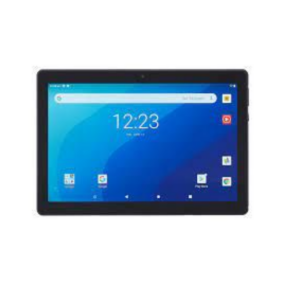

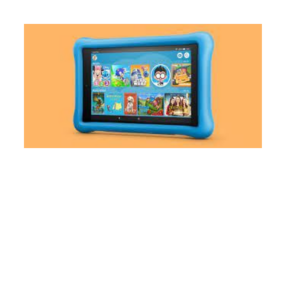

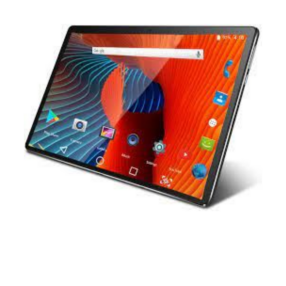

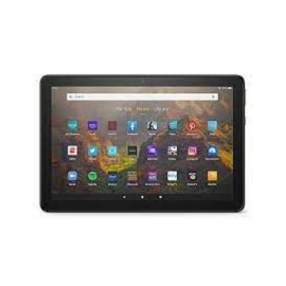

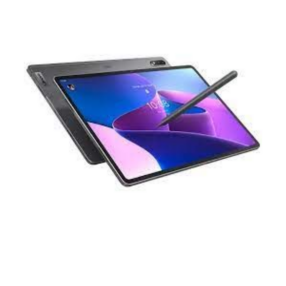

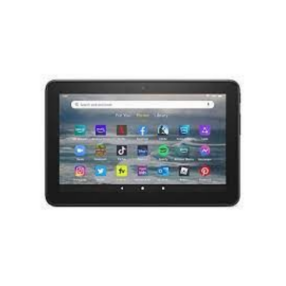

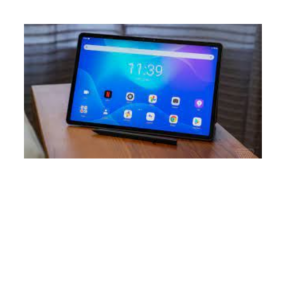

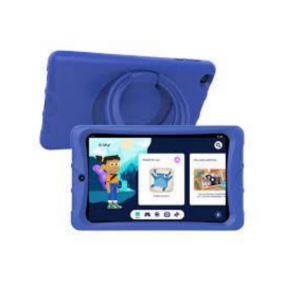

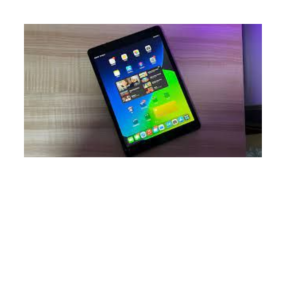

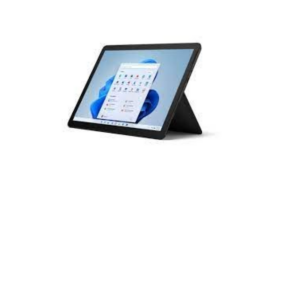

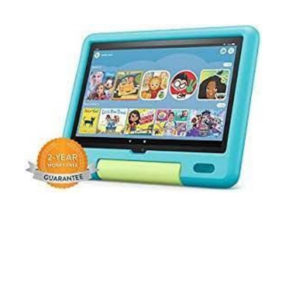

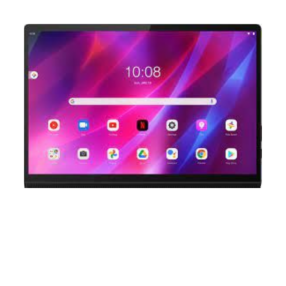

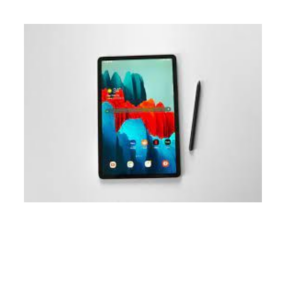

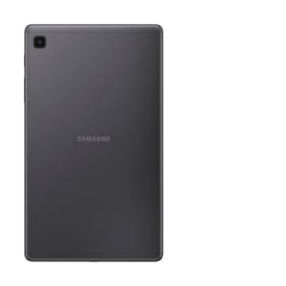

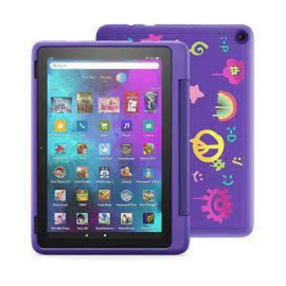

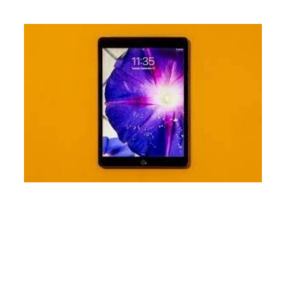

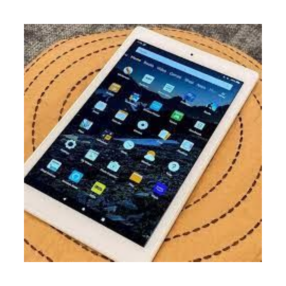

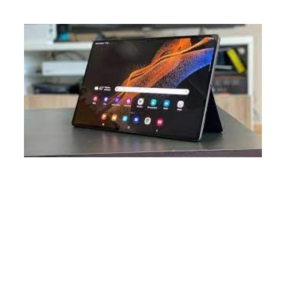

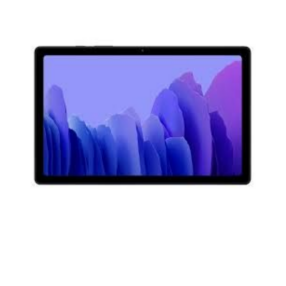

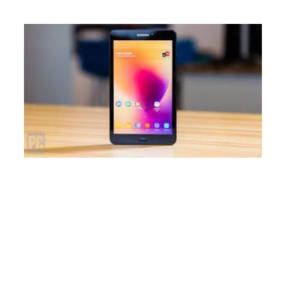

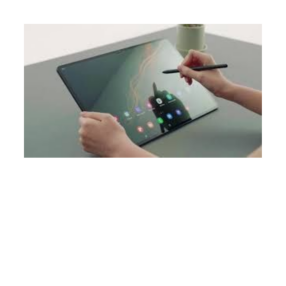

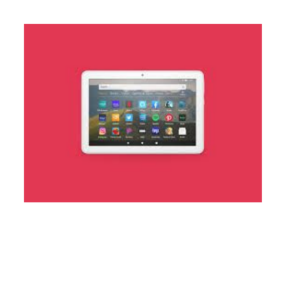

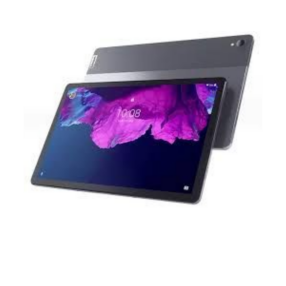

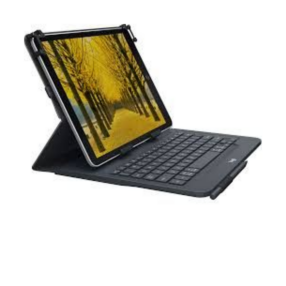

In [5]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

this fetches the images from the google slides for the different picture chosen

In [6]:
images.shape

torch.Size([50, 3, 224, 224])

returns the dimmensions of the images above. (I think it means 5o images, 3 colors, and the actual dimensions are 224 x 224)

In [9]:
model(images)

tensor([[-2.4605, -1.3815, -3.6959,  ..., -4.1666,  0.7372,  2.7969],
        [-4.8775, -2.8423, -3.2678,  ..., -3.6214,  1.6941,  3.3944],
        [-2.6060, -3.9377, -1.8811,  ..., -5.7281,  0.6326,  5.2658],
        ...,
        [-3.4398, -2.2726, -1.5774,  ..., -3.9500,  0.2257,  3.2530],
        [-3.4886, -3.6151, -2.7481,  ..., -3.0603, -3.0993,  4.5886],
        [ 0.0696, -5.0264, -2.9999,  ..., -5.6838,  4.4751,  4.0812]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [10]:
y = model(images)

In [11]:
y.shape

torch.Size([50, 1000])

y was already set as a call for the images and asking for the shape made it return in dimensions

In [12]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [13]:
for i in list(guesses):
    print(labels[i])

switch, electric switch, electrical switch
iPod
iPod
iPod
cellular telephone, cellular phone, cellphone, cell, mobile phone
iPod
pencil sharpener
web site, website, internet site, site
hair slide
hand-held computer, hand-held microcomputer
remote control, remote
cellular telephone, cellular phone, cellphone, cell, mobile phone
printer
cellular telephone, cellular phone, cellphone, cell, mobile phone
binder, ring-binder
hand-held computer, hand-held microcomputer
remote control, remote
switch, electric switch, electrical switch
iPod
printer
remote control, remote
hand-held computer, hand-held microcomputer
monitor
pencil sharpener
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system
iPod
hand-held computer, hand-held microcomputer
analog clock
cassette
iPod
binder, ring-binder
cellular telephone, cellular phone, cellphone, cell, mobile phone
iPod
pencil sharpener
iPod
iPod
hand-held computer, hand-held microcomputer
digital clock
analog clock
desktop computer
cellular 

In [15]:
Y = np.zeros(50,)
Y[25:] = 1

this sets the array to zeros??

In [17]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
X = y.detach().cpu().numpy() 

x converted to y

In [19]:
X.shape

(50, 1000)

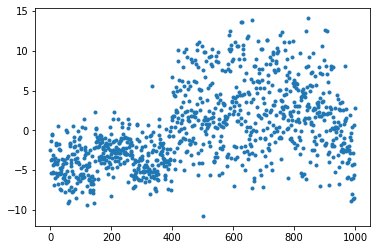

In [20]:
plt.plot(X[0],'.')

plotting the array of images

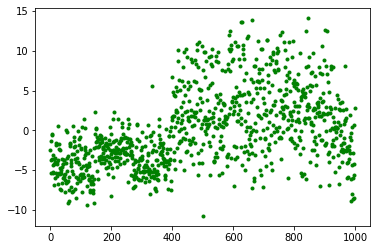

In [ ]:
plt.plot(X[0],'g.')

In [21]:
X[0]

array([-2.46049070e+00, -1.38149762e+00, -3.69585681e+00, -5.34020472e+00,
       -6.05603099e-01, -4.75395322e-01, -3.60847616e+00, -5.19344044e+00,
       -3.12439346e+00, -4.32541513e+00, -5.41088486e+00, -6.81990576e+00,
       -4.22055197e+00, -3.61819077e+00, -3.96456289e+00, -5.99811125e+00,
       -3.42334461e+00, -1.60507131e+00, -1.82157028e+00, -5.39297152e+00,
       -5.73763418e+00, -3.95595431e+00, -4.27938271e+00, -1.65666008e+00,
       -6.69248056e+00,  5.75458407e-01, -3.78195119e+00, -2.31912732e+00,
       -1.65188920e+00, -5.39521790e+00, -7.40098190e+00, -2.50263596e+00,
       -4.69500923e+00, -5.53924322e+00, -5.36696148e+00, -7.49043989e+00,
       -4.99208879e+00, -4.60709286e+00, -3.65613937e+00, -6.64662552e+00,
       -4.21557379e+00, -6.00938606e+00, -4.17251587e+00, -5.63765717e+00,
       -5.85100651e+00, -3.67672920e+00, -3.74032927e+00, -5.46793556e+00,
       -7.79892826e+00, -6.21836424e+00, -6.60337353e+00, -6.61611557e-04,
       -4.12942934e+00, -

In [22]:
np.argmax(X[0])

844

In [23]:
labels[948]

'Granny Smith'

In [24]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [25]:
for i in top_ten:
    print(labels[i])

switch, electric switch, electrical switch
modem
lipstick, lip rouge
lighter, light, igniter, ignitor
whistle
wine bottle
sunscreen, sunblock, sun blocker
hand blower, blow dryer, blow drier, hair dryer, hair drier
remote control, remote
hair spray


this gives the top 10 guesses

In [14]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

the system takes a guess on the elements in the images. so far, it did its best LOL

In [ ]:
labels[844],labels[662],labels[629]

('switch, electric switch, electrical switch', 'modem', 'lipstick, lip rouge')

a test of returning the different names produced by the system

(array([  9.,  86., 187., 234., 161., 124.,  79.,  62.,  45.,  13.]),
 array([-10.740926 ,  -8.258633 ,  -5.7763405,  -3.2940478,  -0.8117552,
          1.6705375,   4.15283  ,   6.635123 ,   9.117415 ,  11.599709 ,
         14.082001 ], dtype=float32),
 <a list of 10 Patch objects>)

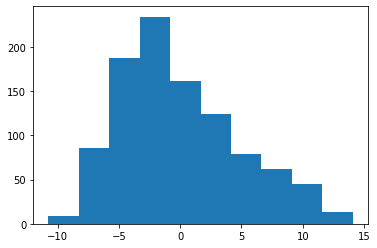

In [26]:
plt.hist(X[0])

provides the value of the first elements in the list

In [27]:
X = GPU_data(X)
Y = GPU_data(Y)

converting X and Y into a format that can  be processed by a graphics processing unit

In [28]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

calculate the softmax of an input and convert probabilties to 1 ??

In [29]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [30]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [31]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [32]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [33]:
X.shape

torch.Size([50, 1000])

In [34]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

returning the image data for testing??

In [35]:
def model(x,w):

    return x@w[0]

In [36]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

calculates accuracy 

In [40]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▆▃▁▁▄▁▁▇▄▂▅▇▇█▄██▂██▆▆▂▅▁▁█▁█▅▃▅█▇▅▅▅▅█▁
loss,▃▆██▅██▂▅▇▄▂▂▁▅▁▁▇▁▁▃▃▇▄██▁█▁▄▆▄▁▂▄▄▄▄▁█
acc_train,0.46875
loss,0.84451


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

In [41]:
import numpy as np
import wandb

##sadly, i did not know how to report the runs properly but i did my best just to show documentation.

In [56]:
wandb.init()
wandb.log({"loss": 0.78201}, commit=False)

wandb.log({"accuracy": 0.3438})

In [52]:
wandb.init()
wandb.log({"loss": 0.2}, commit=False)

wandb.log({"accuracy": 0.8})

accuracy,▁
loss,▁
accuracy,0.3438
loss,0.78201


In [53]:
wandb.init()
wandb.log({"loss": 0.5008}, commit=False)

wandb.log({"accuracy": 0.875})

accuracy,▁
loss,▁
accuracy,0.8
loss,0.2


In [54]:
wandb.init()
wandb.log({"loss": 0.782}, commit=False)

wandb.log({"accuracy": 0.2813})

accuracy,▁
loss,▁
accuracy,0.875
loss,0.5008
